In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering 

from scipy.stats import zscore

Load excel sheet into pandas

In [116]:
df = pd.read_excel('Credit_Card_Customer_Data.xlsx')

View first 10 rows

In [117]:
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


we need to drop the serial number as its not useful

In [118]:
df = df.drop(['Sl_No'], axis=1)

View first and last rows

In [119]:
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [120]:
df.tail()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,51108,99000,10,1,10,0
656,60732,84000,10,1,13,2
657,53834,145000,8,1,9,1
658,80655,172000,10,1,15,0
659,80150,167000,9,0,12,2


Inspect the data type

In [121]:
df.dtypes

Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

All the features have integer values based on the above output

Check for missing values

In [122]:
df.isnull().any()

Customer Key           False
Avg_Credit_Limit       False
Total_Credit_Cards     False
Total_visits_bank      False
Total_visits_online    False
Total_calls_made       False
dtype: bool

From the output above, we have no null value

Next we check the info

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(6)
memory usage: 31.0 KB


Check for unique values

In [124]:
df.nunique()

Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

checking to ensure no duplicated rows

In [125]:
df[df.duplicated(['Customer Key'], keep=False)]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,47437,100000,6,0,12,3
48,37252,6000,4,0,2,8
104,97935,17000,2,1,2,10
332,47437,17000,7,3,1,0
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2
411,50706,44000,4,5,0,2
432,37252,59000,6,2,1,2
541,50706,60000,7,5,2,2
632,97935,187000,7,1,7,0


From the information above, although there are duplication in the customer key, no row is repeated, so its a separate data

##### Checking for negative values

In [126]:
for i in list(df.columns):
    print "There are ", len(df[df[i] < 0]), "negative values in", i
    print "\n"

There are  0 negative values in Customer Key


There are  0 negative values in Avg_Credit_Limit


There are  0 negative values in Total_Credit_Cards


There are  0 negative values in Total_visits_bank


There are  0 negative values in Total_visits_online


There are  0 negative values in Total_calls_made




Based on the information above, we can see negative values in the Total_visits_online feature/column.
that seems wrong because the minimum value for that variable should be 0

we would handle this error by replacing negative values with zero

In [127]:

# df[df['Total_visits_online'] < 0] = 0

df[df < 0] = 0


checking for neg values again 

In [128]:
for i in list(df.columns):
    print "There are ", len(df[df[i] < 0]), "negative values in", i
    print "\n"

There are  0 negative values in Customer Key


There are  0 negative values in Avg_Credit_Limit


There are  0 negative values in Total_Credit_Cards


There are  0 negative values in Total_visits_bank


There are  0 negative values in Total_visits_online


There are  0 negative values in Total_calls_made




Next we will take a look at the statistical distribution of the data

In [129]:
df.describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


next we check for outliers

Box plot for Customer Key


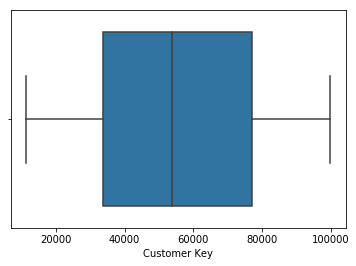




Box plot for Avg_Credit_Limit


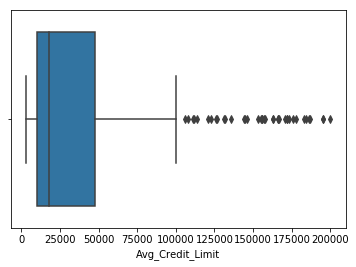




Box plot for Total_Credit_Cards


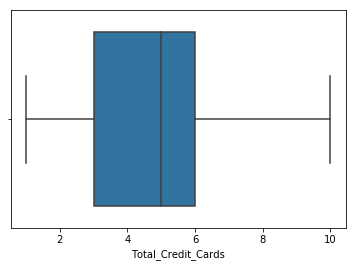




Box plot for Total_visits_bank


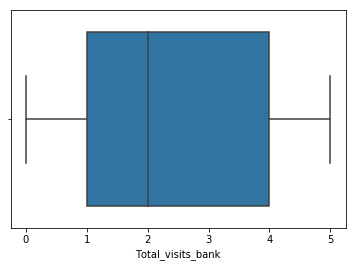




Box plot for Total_visits_online


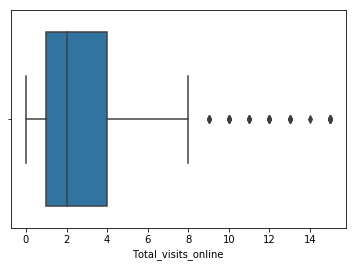




Box plot for Total_calls_made


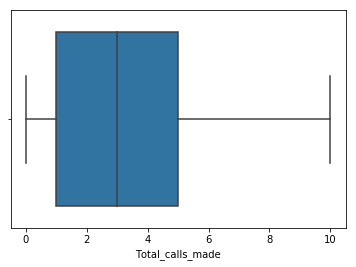

In [130]:
for feature in list(df.columns):
    print "Box plot for " + feature
    sns.boxplot(x=df[feature])
    plt.show()
    print "\n\n"

From the box plot analysis above, we can confirm that: 
    
* Avg_Credit_Limit feature has outliers
* Total_visits_online feature has outliers

Analysis of the body of distribution

Box plot for Customer Key


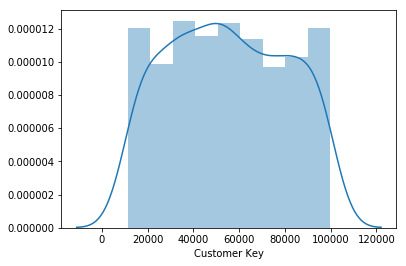




Box plot for Avg_Credit_Limit


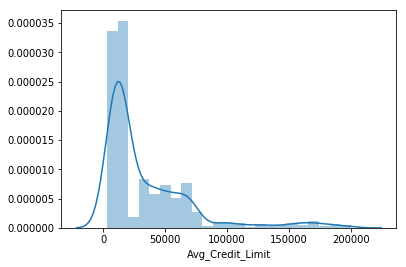




Box plot for Total_Credit_Cards


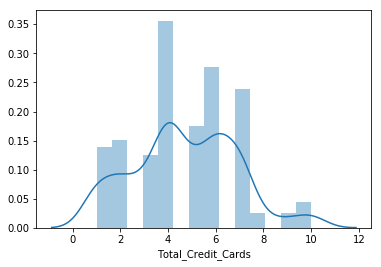




Box plot for Total_visits_bank


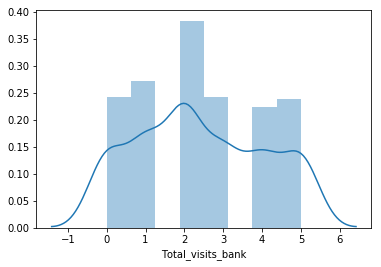




Box plot for Total_visits_online


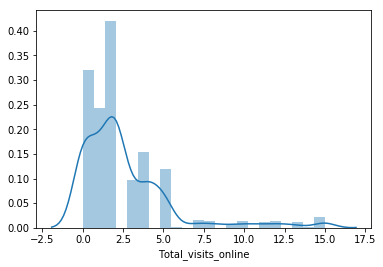




Box plot for Total_calls_made


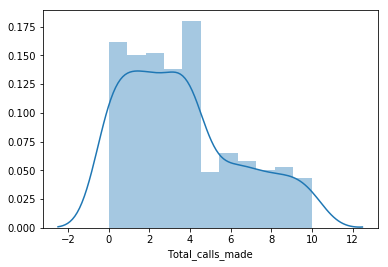

In [131]:
for feature in list(df.columns):
    print "Box plot for " + feature
    sns.distplot(df[feature], kde=True)
    plt.show()
    print "\n\n"

The distribution above also shows that and have outliers

##### Detecting outliers using Skewness

In [132]:
for column in list(df):
    print column, ":", df[column].skew()
    print

Customer Key : 0.051461990601768696

Avg_Credit_Limit : 2.202395623436587

Total_Credit_Cards : 0.14487899029570606

Total_visits_bank : 0.14189601482438785

Total_visits_online : 2.2256067138726565

Total_calls_made : 0.6589053024181467



The skewness value should be btw -1 and 1 if the data is normally distributed

From the analysis above, we can confirm that:

* Avg_Credit_Limit feature has outliers because it is skewed
* Total_visits_online feature has outliers because it is skewed

#### Treatment of outliers

We can handle outliers using

a) Log Transformation

b) Replacing Outliers with Central Values such as Median

c) Drop the outliers if there is no significant data loss

I will go with the log transformation strategy

In [133]:
df['Avg_Credit_Limit'] = np.log(df['Avg_Credit_Limit'])
df['Total_visits_online'] = np.log(df['Total_visits_online'])

/Users/ewomazinouka/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [134]:
df[df < 0] = 0

# df[df['Total_visits_online'] < 0]

In [135]:
for column in ['Avg_Credit_Limit', 'Total_visits_online']:
    print column, ":", df[column].skew()
    print

Avg_Credit_Limit : 0.39375329930733727

Total_visits_online : 0.7667186774245981



Box plot for Avg_Credit_Limit


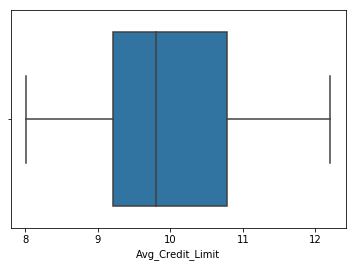

In [136]:
for feature in ['Avg_Credit_Limit']:
    print "Box plot for " + feature
    sns.boxplot(x=df[feature])
    plt.show()
    print "\n\n"

### Bi-variate analysis

#### Using Pair plot

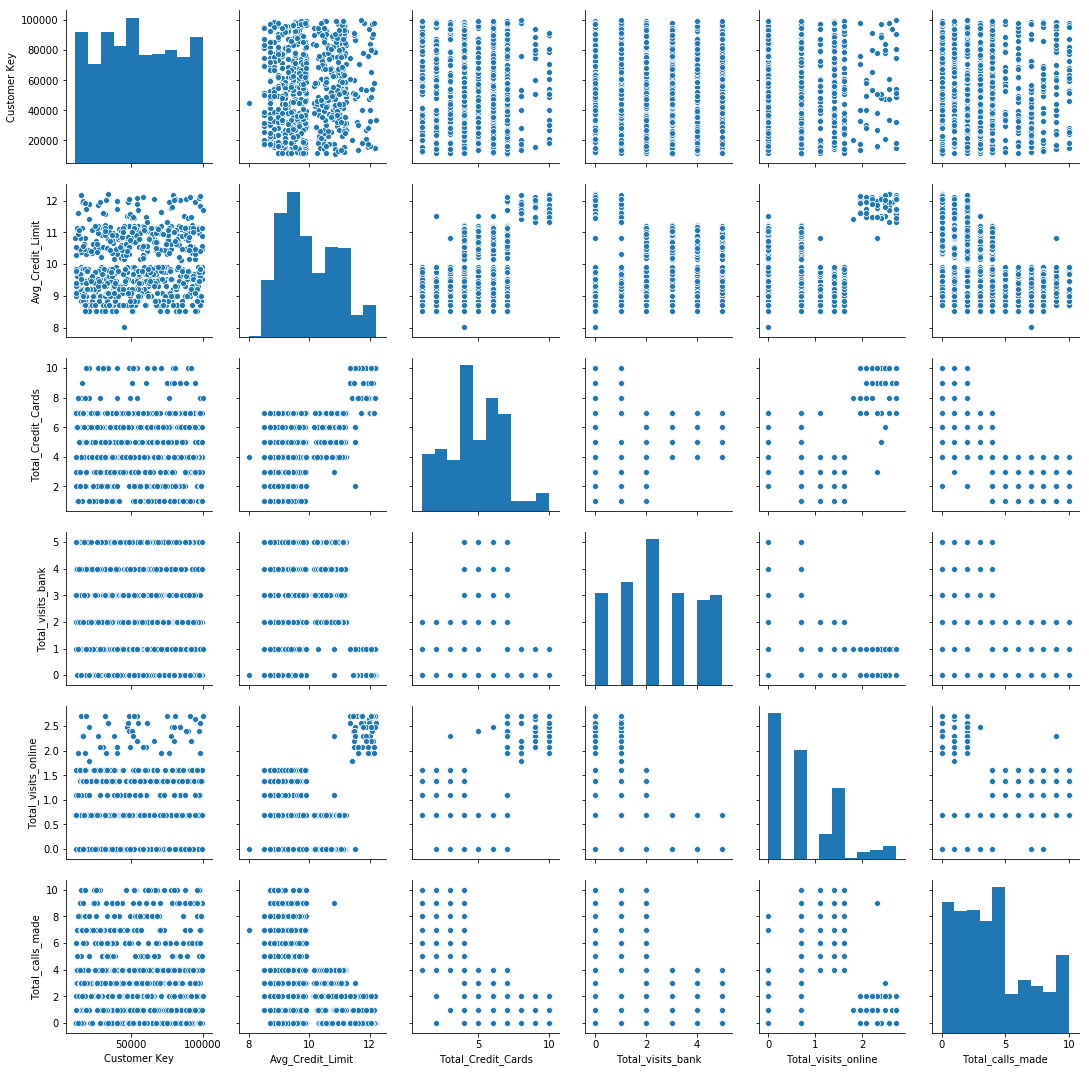

In [137]:
sns.pairplot(df)

From the analysis above it seems that there is no strong linear relationship between any of the features/variables, but we will verify by generating a heatmap next

In [138]:
corr = df.corr()
print corr

                     Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
Customer Key             1.000000          0.072692           -0.010281   
Avg_Credit_Limit         0.072692          1.000000            0.586243   
Total_Credit_Cards      -0.010281          0.586243            1.000000   
Total_visits_bank       -0.000560          0.073937            0.315796   
Total_visits_online      0.023022          0.104745           -0.061622   
Total_calls_made         0.005968         -0.466308           -0.651251   

                     Total_visits_bank  Total_visits_online  Total_calls_made  
Customer Key                 -0.000560             0.023022          0.005968  
Avg_Credit_Limit              0.073937             0.104745         -0.466308  
Total_Credit_Cards            0.315796            -0.061622         -0.651251  
Total_visits_bank             1.000000            -0.632113         -0.506016  
Total_visits_online          -0.632113             1.000000          0.335

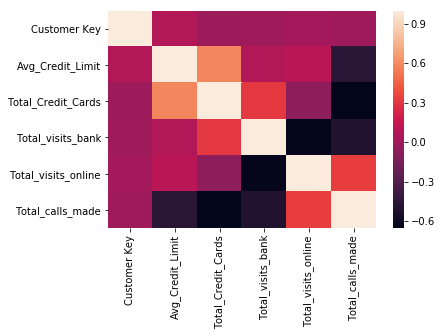

In [139]:
sns.heatmap(corr)

The heatmap shows us that :


* there is a strong positive correlation of 0.59 between Avg_Credit_Limit and Total_Credit_Cards

* there is a strong negative correlation of -0.651 between Total_calls_made and Total_Credit_Cards

* there is a strong negative correlation of -0.632 between Total_visits_online and Total_visits_bank


# 2 Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

we need to remove the units from each column

In [140]:
dfScaled=df.apply(zscore)

In [141]:
dfScaled.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.246920,1.630478,-1.249225,-0.860451,-1.001984,-1.251537
1,-0.653203,0.885387,-0.787585,-1.473731,2.158203,1.891859
2,-1.476098,0.885387,1.058973,-0.860451,0.505809,0.145528
3,-0.571901,0.336281,0.135694,-0.860451,-1.001984,0.145528
4,-0.300857,1.630478,0.597334,-1.473731,2.408431,-0.203739


Text(0.5,1,'Selecting k with the Elbow Method')

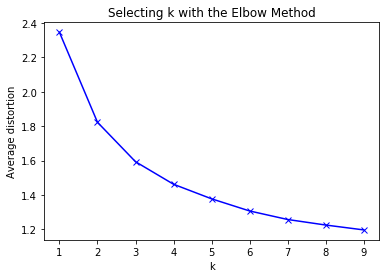

In [142]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfScaled)
    prediction=model.predict(dfScaled)
    meanDistortions.append(sum(np.min(cdist(dfScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dfScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Based on the bend above, 4 clusters seems like a perfect value

In [143]:
final_model=KMeans(4)
final_model.fit(dfScaled)
prediction=final_model.predict(dfScaled)

#Append the prediction 
df["GROUP"] = prediction
dfScaled["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

Groups Assigned : 



,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,87073,11.512925,2,1,0.000000,0,2
1,38414,10.819778,3,0,2.302585,9,0
2,17341,10.819778,7,1,1.098612,4,1
3,40496,10.308953,5,1,0.000000,4,1
4,47437,11.512925,6,0,2.484907,3,3


Analyze the distribution of the data among the two groups (K = 3). One of the most informative visual tool is boxplot

In [144]:
dfKmeansClust = df.groupby(['GROUP'])
dfKmeansClust.mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,
0,55494.009009,9.314403,2.400901,0.932432,1.207885,6.909910
1,34129.344828,10.000005,5.438424,3.438424,0.251257,2.004926
2,77351.286486,10.315470,5.578378,3.518919,0.243538,2.000000
3,56708.760000,11.825513,8.740000,0.600000,2.352697,1.080000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a248872d0>,
      dtype=object)

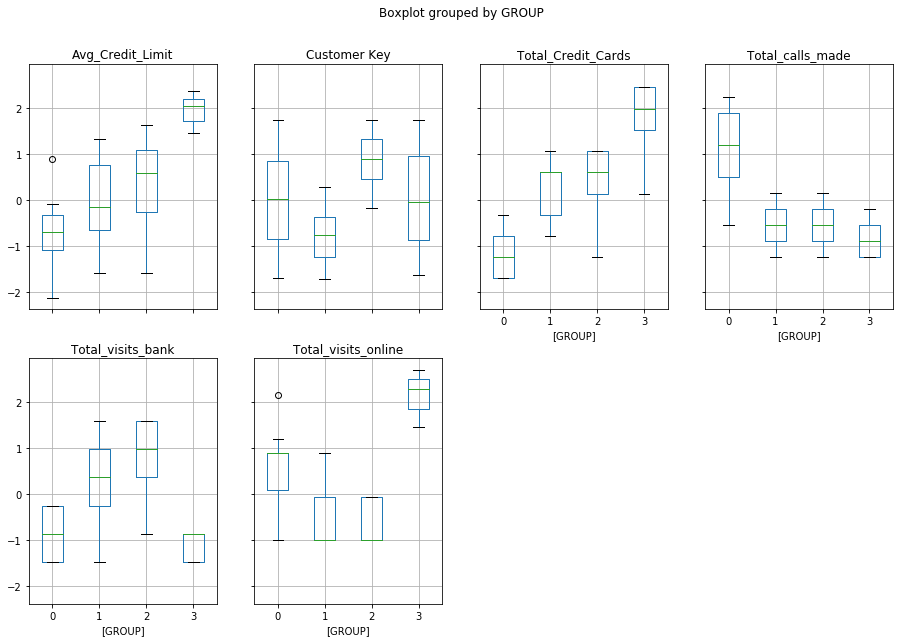

In [145]:
dfScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

# 3 Hierarchical Clustering

In [147]:
df=df.iloc[:,:-1]
dfScaled = df.apply(zscore)
dfScaled.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.246920,1.630478,-1.249225,-0.860451,-1.001984,-1.251537
1,-0.653203,0.885387,-0.787585,-1.473731,2.158203,1.891859
2,-1.476098,0.885387,1.058973,-0.860451,0.505809,0.145528
3,-0.571901,0.336281,0.135694,-0.860451,-1.001984,0.145528
4,-0.300857,1.630478,0.597334,-1.473731,2.408431,-0.203739


In [149]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [150]:
model.fit(dfScaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3, pooling_func='deprecated')

In [151]:
df['labels'] = model.labels_
df.head(10)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,87073,11.512925,2,1,0.000000,0,0
1,38414,10.819778,3,0,2.302585,9,2
2,17341,10.819778,7,1,1.098612,4,1
3,40496,10.308953,5,1,0.000000,4,0
4,47437,11.512925,6,0,2.484907,3,1
5,58634,9.903488,3,0,0.000000,8,2
6,48370,11.512925,5,0,2.397895,2,1
7,37376,9.615805,3,0,0.000000,1,2
8,82490,8.517193,2,0,0.693147,2,2
9,44770,8.006368,4,0,0.000000,7,2


In [152]:
dfCluster = df.groupby(['labels'])

In [153]:
dfCluster.mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,,
0,54978.836364,10.150844,5.511688,3.496104,0.243052,1.994805
1,55936.843137,11.805793,8.705882,0.607843,2.328107,1.137255
2,55239.830357,9.318149,2.410714,0.933036,1.203289,6.870536


In [154]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [155]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [157]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(dfScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(dfScaled))

c

0.8277795944324249

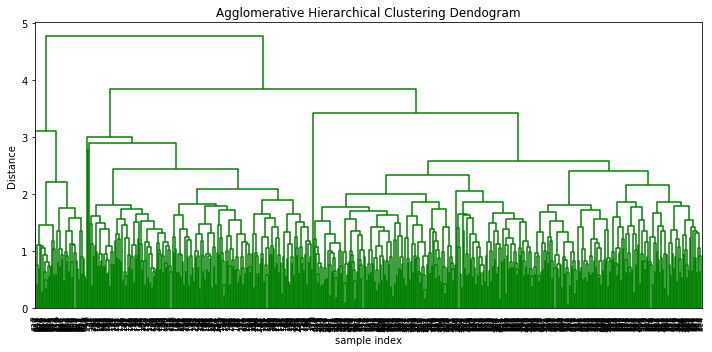

In [158]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [159]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(dfScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(dfScaled))

c

0.7841670428463229

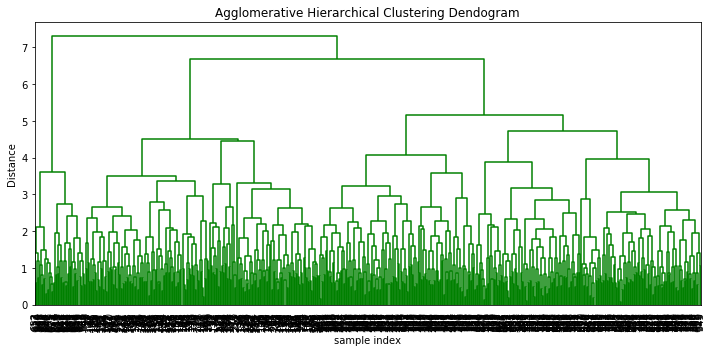

In [160]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [161]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(dfScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(dfScaled))

c

0.7347141391999845

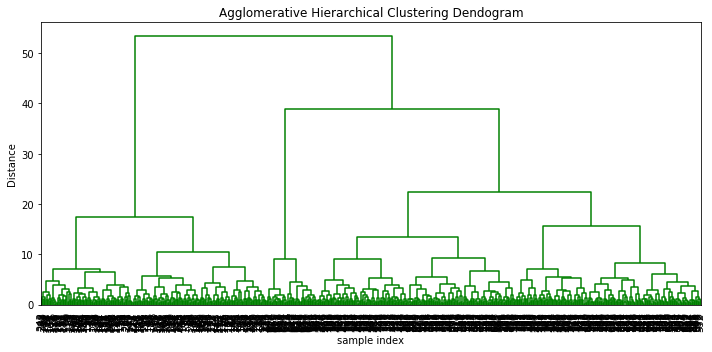

In [162]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()